In [0]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [0]:
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,...,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,season,year,state,distrct,lvl_4_n,level_4,cc_plt_,cc_r_nt,dt_f_sw,dt_f_ct,dt_f_hr,crop_nm,Name
0,0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.3,Hectare,18-11-2018,03-04-2019,30-04-2019,Wheat,43REL
1,1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.4,Hectare,22-11-2018,03-04-2019,30-04-2019,Wheat,43REL
2,2,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.3,Hectare,18-11-2018,03-04-2019,30-04-2019,Wheat,43REL
3,3,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.4,Hectare,22-11-2018,03-04-2019,30-04-2019,Wheat,43REL
4,4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763

In [0]:
print(df.shape )

(576, 126)


In [0]:
df.drop(['lvl_4_n' ,'level_4',"Unnamed: 0","season", "year",	"state","distrct", "Name","cc_r_nt",'dt_f_sw', 'dt_f_ct', 'dt_f_hr'], axis = 1, inplace = True) 

In [0]:
# df.drop(["Unnamed: 0"], axis = 1, inplace = True) 

In [0]:
# df.drop(['lvl_4_n' ,'level_4'], axis = 1, inplace = True) 

In [0]:
df.head()

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-02,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Wheat
2,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat
3,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.1114

In [0]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [0]:
df.shape

(546, 114)

In [0]:
print(df.columns)

Index(['lng', 'lat', 'ndvi_2018-08-01', 'ndvi_2018-08-03', 'ndvi_2018-08-06',
       'ndvi_2018-08-08', 'ndvi_2018-08-11', 'ndvi_2018-08-13',
       'ndvi_2018-08-16', 'ndvi_2018-08-18',
       ...
       'ndvi_2019-04-18', 'ndvi_2019-04-20', 'ndvi_2019-04-23',
       'ndvi_2019-04-25', 'ndvi_2019-04-28', 'ndvi_2019-04-30', 'Unnamed: 0.1',
       'index', 'cc_plt_', 'crop_nm'],
      dtype='object', length=114)


In [0]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=0,columns=['ndvi_2018-08-01', 'ndvi_2018-08-03', 'ndvi_2018-08-06', 'ndvi_2018-08-08', 'ndvi_2018-08-11', 'ndvi_2018-08-13', 'ndvi_2018-08-16', 'ndvi_2018-08-18', 'ndvi_2018-08-21', 'ndvi_2018-08-23', 'ndvi_2018-08-26', 'ndvi_2018-08-28', 'ndvi_2018-08-31', 'ndvi_2018-09-02', 'ndvi_2018-09-05', 'ndvi_2018-09-07', 'ndvi_2018-09-10', 'ndvi_2018-09-12', 'ndvi_2018-09-17', 'ndvi_2018-09-20', 'ndvi_2018-09-22', 'ndvi_2018-09-25', 'ndvi_2018-09-27', 'ndvi_2018-09-30', 'ndvi_2018-10-02', 'ndvi_2018-10-05', 'ndvi_2018-10-07', 'ndvi_2018-10-10', 'ndvi_2018-10-12', 'ndvi_2018-10-15', 'ndvi_2018-10-17', 'ndvi_2018-10-20', 'ndvi_2018-10-22', 'ndvi_2018-10-25', 'ndvi_2018-10-27', 'ndvi_2018-10-30', 'ndvi_2018-11-01', 'ndvi_2018-11-04', 'ndvi_2018-11-06', 'ndvi_2018-11-09', 'ndvi_2018-11-11', 'ndvi_2018-11-14', 'ndvi_2018-11-16', 'ndvi_2018-11-19', 'ndvi_2018-11-21', 'ndvi_2018-11-24', 'ndvi_2018-11-26', 'ndvi_2018-11-29', 'ndvi_2018-12-01', 'ndvi_2018-12-04', 'ndvi_2018-12-06', 'ndvi_2018-12-09', 'ndvi_2018-12-11', 'ndvi_2018-12-14', 'ndvi_2018-12-16', 'ndvi_2018-12-19', 'ndvi_2018-12-21', 'ndvi_2018-12-24', 'ndvi_2018-12-26', 'ndvi_2018-12-29', 'ndvi_2018-12-31', 'ndvi_2019-01-03', 'ndvi_2019-01-05', 'ndvi_2019-01-08', 'ndvi_2019-01-10', 'ndvi_2019-01-13', 'ndvi_2019-01-15', 'ndvi_2019-01-20', 'ndvi_2019-01-23', 'ndvi_2019-01-25', 'ndvi_2019-01-28', 'ndvi_2019-01-30', 'ndvi_2019-02-02', 'ndvi_2019-02-04', 'ndvi_2019-02-07', 'ndvi_2019-02-09', 'ndvi_2019-02-12', 'ndvi_2019-02-14', 'ndvi_2019-02-17', 'ndvi_2019-02-19', 'ndvi_2019-02-22', 'ndvi_2019-02-24', 'ndvi_2019-02-27', 'ndvi_2019-03-01', 'ndvi_2019-03-04', 'ndvi_2019-03-06', 'ndvi_2019-03-09', 'ndvi_2019-03-11', 'ndvi_2019-03-14', 'ndvi_2019-03-16', 'ndvi_2019-03-19', 'ndvi_2019-03-21', 'ndvi_2019-03-24', 'ndvi_2019-03-26', 'ndvi_2019-03-29', 'ndvi_2019-03-31', 'ndvi_2019-04-03', 'ndvi_2019-04-05', 'ndvi_2019-04-08', 'ndvi_2019-04-10', 'ndvi_2019-04-13', 'ndvi_2019-04-15', 'ndvi_2019-04-18', 'ndvi_2019-04-20', 'ndvi_2019-04-23', 'ndvi_2019-04-25', 'ndvi_2019-04-28', 'ndvi_2019-04-30'])         


Using TensorFlow backend.


In [0]:
# # Import required packages
# from sklearn import preprocessing
# import pandas as pd
# # Create a label (category) encoder object
# le = preprocessing.LabelEncoder()
# # Fit the encoder to the pandas column
# le.fit(df['crop_nm'])

In [0]:
# # Apply the fitted encoder to the pandas column
# en=le.transform(df['crop_nm']) 

In [0]:
# print(en)

In [0]:
# en.shape

In [0]:
# data['encoded'] = en

In [0]:
# print(data['crop_nm'].unique())
# print(data['encoded'].unique())

In [0]:
# df['crop_nm'] = pd.Categorical(df['crop_nm'])
# dfDummies = pd.get_dummies(df['crop_nm'])
# df = pd.concat([df, dfDummies], axis=1)
# # df.head()

In [0]:
df.head()

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-02,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Wheat
4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,161,2653,0.3,Wheat
5,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.1114

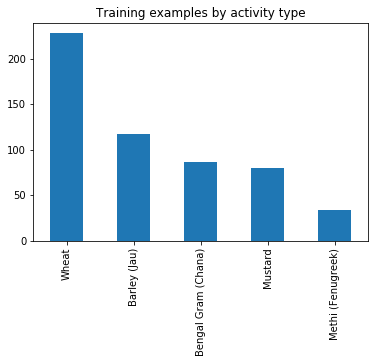

In [0]:
df['crop_nm'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [0]:

from sklearn.model_selection import train_test_split

# #converting dataset into x_train and y_train
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(data)

x = df.iloc[:, :-6].values
y = df.iloc[:, -6:-1].values

In [0]:
print(x.shape)
print(y.shape)

(546, 108)
(546, 5)


In [0]:
#spliting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, 
test_size=1/3, random_state=0)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(364, 108)
(364, 5)
(182, 108)
(182, 5)


In [0]:
print(len(x_train[0]))
print(len(y_train[0]))

108
5


In [0]:
# data.drop(['crop_nm'], axis = 1, inplace = True) 

In [0]:
# data.head()

#Kmeans Clustering

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(data.iloc[:,:-1])
clust = pd.crosstab(kmeans.labels_, data['crop_nm'])
clust

crop_nm,Barley (Jau),Bengal Gram (Chana),Methi (Fenugreek),Mustard,Wheat
row_0,,,,,
0,17,10,22,13,39
1,54,21,8,32,71
2,31,30,0,19,48
3,4,14,4,10,19
4,11,12,0,6,51


Upon clustering using kmeans, almost all the Methi activities seem to separate out while the passive ones are still mixed. Rest are distributed in three to four different clusters.

In [0]:
kmeans.cluster_centers_.shape


(5, 113)

#Neural Network 

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(364, 108)
(364, 5)
(182, 108)
(182, 5)


In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (1,x_train.shape[0],x_train.shape[1]))
# y_train = np.reshape(y_train, (1,y_train.shape[0],y_train.shape[1]))

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1, 364, 108)
(364, 5)
(182, 108)
(182, 5)


In [0]:
verbose, epochs, batch_size = 0, 15, 64
n_timesteps, n_features, n_outputs = x_train.shape[0], x_train.shape[2], 5
model = Sequential()
model.add(LSTM(364, input_shape=(x_train.shape[1],x_train.shape[0],n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

ValueError: ignored

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
_, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(accuracy)

ValueError: ignored

In [0]:
verbose, epochs, batch_size = 0, 15, 64
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
_, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(accuracy)

In [0]:
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]

In [0]:
from sklearn.metrics import accuracy_score
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from keras.optimizers import  Adam
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import to_categorical


In [0]:
# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# y_train = to_categorical(y_train)
# create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(LSTM(units=50))
# model.add(Dense(1))

# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=3, batch_size=16, verbose=2)


In [0]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (1,x_train.shape[0],x_train.shape[1]))
# y_train = np.reshape(y_train, (1,y_train.shape[0],y_train.shape[1]))

In [0]:
# print(y_train.reshape(1,1))

In [0]:
y_train.shape

(364, 5)

In [0]:
x_train.shape

(1, 364, 113)

#XGB

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [0]:
# le = LabelEncoder()
# for x in [train, test]:
#     x['crop_nm'] = le.fit_transform(x.crop_nm)

# Import required packages
from sklearn import preprocessing
import pandas as pd

# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to the pandas column
le.fit(df['crop_nm'])

#Apply the fitted encoder to the pandas column
en=le.transform(df['crop_nm']) 

df['encoded'] = en

In [0]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [0]:
df.drop(['crop_nm'], axis = 1, inplace = True) 

In [0]:
data.head()

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-02,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Wheat
4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,161,2653,0.3,Wheat
5,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.1114

In [0]:
df.head()

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-02,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,encoded
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,4
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,4
4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,161,2653,0.3,4
5,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,

In [0]:
X, y = data.iloc[:,:],df.iloc[:,-1]

IndexingError: ignored

In [0]:
X = df.iloc[:, :-2].values
y = df.iloc[:,-1].values

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [0]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [0]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((409, 112), (409,), (137, 112), (137,))

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.55%


In [0]:
print(y_test)

[0 0 3 2 0 4 4 2 3 4 4 1 4 4 3 4 4 4 4 4 4 0 2 3 1 2 4 4 1 2 3 4 4 2 4 4 4
 1 4 1 1 4 4 0 1 1 4 0 4 4 2 4 4 2 0 4 1 4 4 1 4 4 0 3 3 0 4 4 4 3 1 4 4 2
 4 3 1 1 4 0 0 4 0 0 3 3 3 4 4 1 0 0 4 4 0 4 0 1 0 1 0 3 4 0 1 1 3 0 4 0 1
 0 4 0 4 4 0 3 4 4 3 0 1 1 1 0 0 4 4 3 4 4 4 3 0 3 3]


In [0]:
print(y_pred)

[0 0 3 4 3 1 4 0 4 4 4 4 1 1 4 4 0 1 4 4 0 0 2 4 1 3 4 4 4 2 3 3 4 4 4 4 4
 3 0 4 4 0 4 4 4 0 0 0 0 0 2 4 4 2 4 4 4 4 4 4 4 1 4 2 4 0 4 4 1 4 4 4 4 2
 1 4 4 4 4 0 4 4 0 4 3 1 4 4 4 1 0 0 4 4 0 4 4 1 0 1 4 4 0 0 1 1 0 0 4 4 1
 0 4 4 1 4 4 4 3 4 3 4 4 4 4 4 4 0 4 3 4 4 4 3 4 3 3]


In [0]:
print(y_test.shape)
print(y_pred.shape)

(137,)
(137,)


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51        29
           1       0.44      0.32      0.37        22
           2       0.83      0.56      0.67         9
           3       0.62      0.40      0.48        20
           4       0.50      0.67      0.57        57

    accuracy                           0.53       137
   macro avg       0.58      0.48      0.52       137
weighted avg       0.54      0.53      0.52       137



In [0]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.55%


In [0]:
print(data.head())
print(df.head())

        lng        lat  ndvi_2018-08-01  ...  index  cc_plt_       crop_nm
0  75.51125  27.412203         0.563175  ...   2652      0.3         Wheat
1  75.51125  27.412203         0.563175  ...   2654      0.4         Wheat
4  75.51125  27.412199         0.563175  ...   2653      0.3         Wheat
5  75.51125  27.412199         0.563175  ...   2657      0.4         Wheat
8  75.51125  27.412233         0.563175  ...   2655      0.3  Barley (Jau)

[5 rows x 114 columns]
        lng        lat  ndvi_2018-08-01  ...  index  cc_plt_  encoded
0  75.51125  27.412203         0.563175  ...   2652      0.3        4
1  75.51125  27.412203         0.563175  ...   2654      0.4        4
4  75.51125  27.412199         0.563175  ...   2653      0.3        4
5  75.51125  27.412199         0.563175  ...   2657      0.4        4
8  75.51125  27.412233         0.563175  ...   2655      0.3        0

[5 rows x 114 columns]


In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x, y = data.iloc[:,:],df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((409, 114), (409,), (137, 114), (137,))

In [0]:
x_train

array([[[75.80129   , 27.51101   ,  0.28231101, ...,  0.17173312,
          0.12077703,  0.12658475],
        [75.74597   , 27.803764  ,  0.31076028, ...,  0.11392405,
          0.11774194,  0.10454141],
        [75.6008    , 27.43873   ,  0.40798176, ...,  0.12076923,
          0.11666667,  0.13275409],
        ...,
        [75.598946  , 27.459814  ,  0.44054456, ...,  0.15049776,
          0.13362518,  0.12401264],
        [75.31903   , 27.714794  ,  0.4376212 , ...,  0.19673279,
          0.18351477,  0.17389456],
        [75.69478   , 27.589134  ,  0.26222397, ...,  0.0880761 ,
          0.08521435,  0.10597778]]])

In [0]:
import xgboost as xgb
x, y = df.iloc[:, :-2].values,df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
params = {
    'max_depth': 20,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 5,
    'n_gpus': 0
}

In [0]:
bst = xgb.train(params, dtrain)

In [0]:
pred = bst.predict(dtest)

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49        29
           1       0.59      0.45      0.51        22
           2       0.56      0.56      0.56         9
           3       0.56      0.45      0.50        20
           4       0.57      0.67      0.61        57

    accuracy                           0.55       137
   macro avg       0.55      0.52      0.53       137
weighted avg       0.55      0.55      0.55       137



In [0]:
pred

array([0., 0., 3., 2., 4., 1., 4., 2., 4., 4., 4., 4., 1., 2., 0., 0., 4.,
       1., 4., 4., 4., 4., 2., 0., 0., 3., 4., 4., 4., 2., 4., 0., 4., 4.,
       4., 1., 3., 2., 0., 4., 4., 0., 4., 4., 1., 0., 4., 0., 4., 0., 3.,
       4., 4., 2., 0., 4., 1., 0., 2., 4., 4., 1., 4., 3., 4., 4., 0., 4.,
       1., 4., 1., 4., 4., 3., 4., 3., 4., 1., 4., 0., 4., 4., 0., 4., 3.,
       1., 4., 4., 4., 1., 0., 0., 3., 4., 0., 4., 4., 1., 0., 1., 4., 4.,
       0., 0., 1., 1., 0., 0., 4., 4., 1., 0., 4., 4., 4., 4., 4., 4., 3.,
       4., 3., 3., 4., 4., 0., 2., 0., 4., 4., 3., 4., 4., 4., 3., 4., 3.,
       3.], dtype=float32)

In [0]:
print(np.array(y_test))

[0 0 3 2 0 4 4 2 3 4 4 1 4 4 3 4 4 4 4 4 4 0 2 3 1 2 4 4 1 2 3 4 4 2 4 4 4
 1 4 1 1 4 4 0 1 1 4 0 4 4 2 4 4 2 0 4 1 4 4 1 4 4 0 3 3 0 4 4 4 3 1 4 4 2
 4 3 1 1 4 0 0 4 0 0 3 3 3 4 4 1 0 0 4 4 0 4 0 1 0 1 0 3 4 0 1 1 3 0 4 0 1
 0 4 0 4 4 0 3 4 4 3 0 1 1 1 0 0 4 4 3 4 4 4 3 0 3 3]


In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((409, 112), (409,), (137, 112), (137,))

In [0]:
# from sklearn.datasets import make_classification
# from sklearn import ensemble
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.metrics import log_loss
# from sklearn.model_selection import cross_validate
# # Build a classification task using 3 informative features

# X, y = make_classification(n_samples=1000,
#                            n_features=100,
#                            n_informative=30,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=9,
#                            random_state=0,
#                            shuffle=False)

# skf = cross_validate.StratifiedShuffleSplit(y, 5)

# for train, test in skf:

#     X_train, X_test = X[train], X[test]
#     y_train, y_test = y[train], y[test]

#     clf = ensemble.GradientBoostingClassifier(n_estimators=100)
#     clf_cv = CalibratedClassifierCV(clf, cv=3, method='isotonic')
#     clf_cv.fit(X_train, y_train)
#     probas_cv = clf_cv.predict_proba(X_test)
#     cv_score = log_loss(y_test, probas_cv)

#     clf = ensemble.GradientBoostingClassifier(n_estimators=100)
#     clf.fit(X_train, y_train)
#     probas = clf.predict_proba(X_test)
#     clf_score = log_loss(y_test, probas) 

#     print ('calibrated score:', cv_score)
#     print ('direct clf score:', clf_score)
#     # print

#TEST DATA


In [0]:
tf1=pd.read_csv('new_file.csv')

In [0]:
#Dropping columns based on initials
b48 = [col for col in tf1 if (col.startswith('b4') or col.startswith('b8')) ]

tf2 = tf1.drop(b48 , axis = 1)
tf2.head()


#Writing file
# df.to_csv('/content/df.csv')

,fcc_cluster_segments,x,y,ndvi_2018-09-05,ndvi_2018-09-10,ndvi_2018-09-20,ndvi_2018-09-25,ndvi_2018-09-30,ndvi_2018-10-05,ndvi_2018-10-10,ndvi_2018-10-15,ndvi_2018-10-20,ndvi_2018-10-25,ndvi_2018-10-30,ndvi_2018-11-04,ndvi_2018-11-09,ndvi_2018-11-14,ndvi_2018-11-19,ndvi_2018-11-24,ndvi_2018-11-29,ndvi_2018-12-04,ndvi_2018-12-09,ndvi_2018-12-14,ndvi_2018-12-19,ndvi_2018-12-24,ndvi_2018-12-29,ndvi_2019-01-03,ndvi_2019-01-08,ndvi_2019-01-13,ndvi_2019-01-23,ndvi_2019-01-28,ndvi_2019-02-02,ndvi_2019-02-07,ndvi_2019-02-12,ndvi_2019-02-17,ndvi_2019-02-22,ndvi_2019-02-27,ndvi_2019-03-04,ndvi_2019-03-09,ndvi_2019-03-14,ndvi_2019-03-19,ndvi_2019-03-24,ndvi_2019-03-29,ndvi_2019-04-03,ndvi_2019-04-08,ndvi_2019-04-13,ndvi_2019-04-18,ndvi_2019-04-23,ndvi_2019-04-28
0,100.0,75.063616,28.927945,0.095167,0.047214,0.214864,0.256311,0.188923,0.196409,0.152174,0.182609,0.152709,0.142983,0.033401,0.136196,0.090453,0.053054,0.092969,0.103836,0.097784,0.111932,0.091170,0.162426,0.140723,0.132109,0.134492,0.016453,0.107068,0.087915,0.014601,0.142926,0.021531,0.064795,0.248446,0.196676,0.368814,0.049369,0.068895,0.143881,0.213643,0.157651,0.175478,0.085992,0.092410,0.067584,0.072328,0.067099,0.070588,0.065792
1,101.0,75.064676,28.928138,0.126429,0.059425,0.189427,0.162734,0.183882,0.192910,0.145519,0.189128,0.087145,0.084695,0.031892,0.079394,0.064777,0.038832,0.051003,0.055859,0.065413,0.068296,0.065775,0.075965,0.076401,0.090452,0.074586,0.024995,0.076315,0.067093,0.010369,0.108609,0.014652,0.049469,0.114611,0.096165,0.117691,0.036599,0.040254,0.097080,0.102370,0.078571,0.072989,0.058140,0.062720,0.048407,0.038401,0.039954,0.041183,0.044475
2,159.0,74.613734,28.927367,0.247090,0.022666,0.317928,0.316280,0.349236,0.334801,0.308327,0.303787,0.155995,0.114754,0.222466,0.046836,0.074890,0.095874,0.089615,0.040709,0.029231,0.059486,-0.003042,0.096471,0.061283,0.108614,-0.003024,0.026362,0.061782,0.065495,0.005462,0.069906,0.026846,0.146761,0.077379,0.176675,0.275298,0.128408,0.009970,0.193262,0.215230,0.149066,0.194328,0.093397,0.115720,0.033233,0.054851,0.047399,0.078646,0.032452
3,206.0,75.054263,28.927270,0.132506,0.028613,0.196386,0.248503,0.224887,0.232527,0.171616,0.224299,0.170614,0.181732,0.040386,0.177899,0.074979,0.128920,0.107291,0.199673,0.062960,0.114896,0.071775,0.157143,0.132537,0.124836,0.132938,0.021613,0.130048,0.051378,0.006866,0.227638,0.016925,0.031116,0.120087,0.147568,0.128205,-0.009255,0.051252,0.125417,0.103027,0.098158,0.088808,0.088473,0.100626,0.064645,0.056530,0.066895,0.073955,0.059966
4,238.0,74.921883,28.927367,0.080336,0.103427,0.175464,0.087147,0.186300,0.155556,0.125206,0.130162,0.128752,0.140659,0.023896,0.137851,0.054060,0.085511,0.135538,0.154441,0.071952,0.109785,0.065561,0.168201,0.153245,0.056631,0.128159,0.005937,0.064614,0.023155,-0.006467,0.078676,0.007018,0.007657,0.090461,0.113800,0.165899,0.023980,0.012749,0.089402,0.109317,0.088484,0.090084,0.048400,0.113226,0.058126,0.058083,0.066426,0.084899,0.053930


In [0]:
tf2.head()

,fcc_cluster_segments,x,y,ndvi_2018-09-05,ndvi_2018-09-10,ndvi_2018-09-20,ndvi_2018-09-25,ndvi_2018-09-30,ndvi_2018-10-05,ndvi_2018-10-10,ndvi_2018-10-15,ndvi_2018-10-20,ndvi_2018-10-25,ndvi_2018-10-30,ndvi_2018-11-04,ndvi_2018-11-09,ndvi_2018-11-14,ndvi_2018-11-19,ndvi_2018-11-24,ndvi_2018-11-29,ndvi_2018-12-04,ndvi_2018-12-09,ndvi_2018-12-14,ndvi_2018-12-19,ndvi_2018-12-24,ndvi_2018-12-29,ndvi_2019-01-03,ndvi_2019-01-08,ndvi_2019-01-13,ndvi_2019-01-23,ndvi_2019-01-28,ndvi_2019-02-02,ndvi_2019-02-07,ndvi_2019-02-12,ndvi_2019-02-17,ndvi_2019-02-22,ndvi_2019-02-27,ndvi_2019-03-04,ndvi_2019-03-09,ndvi_2019-03-14,ndvi_2019-03-19,ndvi_2019-03-24,ndvi_2019-03-29,ndvi_2019-04-03,ndvi_2019-04-08,ndvi_2019-04-13,ndvi_2019-04-18,ndvi_2019-04-23,ndvi_2019-04-28
0,100.0,75.063616,28.927945,0.095167,0.047214,0.214864,0.256311,0.188923,0.196409,0.152174,0.182609,0.152709,0.142983,0.033401,0.136196,0.090453,0.053054,0.092969,0.103836,0.097784,0.111932,0.091170,0.162426,0.140723,0.132109,0.134492,0.016453,0.107068,0.087915,0.014601,0.142926,0.021531,0.064795,0.248446,0.196676,0.368814,0.049369,0.068895,0.143881,0.213643,0.157651,0.175478,0.085992,0.092410,0.067584,0.072328,0.067099,0.070588,0.065792
1,101.0,75.064676,28.928138,0.126429,0.059425,0.189427,0.162734,0.183882,0.192910,0.145519,0.189128,0.087145,0.084695,0.031892,0.079394,0.064777,0.038832,0.051003,0.055859,0.065413,0.068296,0.065775,0.075965,0.076401,0.090452,0.074586,0.024995,0.076315,0.067093,0.010369,0.108609,0.014652,0.049469,0.114611,0.096165,0.117691,0.036599,0.040254,0.097080,0.102370,0.078571,0.072989,0.058140,0.062720,0.048407,0.038401,0.039954,0.041183,0.044475
2,159.0,74.613734,28.927367,0.247090,0.022666,0.317928,0.316280,0.349236,0.334801,0.308327,0.303787,0.155995,0.114754,0.222466,0.046836,0.074890,0.095874,0.089615,0.040709,0.029231,0.059486,-0.003042,0.096471,0.061283,0.108614,-0.003024,0.026362,0.061782,0.065495,0.005462,0.069906,0.026846,0.146761,0.077379,0.176675,0.275298,0.128408,0.009970,0.193262,0.215230,0.149066,0.194328,0.093397,0.115720,0.033233,0.054851,0.047399,0.078646,0.032452
3,206.0,75.054263,28.927270,0.132506,0.028613,0.196386,0.248503,0.224887,0.232527,0.171616,0.224299,0.170614,0.181732,0.040386,0.177899,0.074979,0.128920,0.107291,0.199673,0.062960,0.114896,0.071775,0.157143,0.132537,0.124836,0.132938,0.021613,0.130048,0.051378,0.006866,0.227638,0.016925,0.031116,0.120087,0.147568,0.128205,-0.009255,0.051252,0.125417,0.103027,0.098158,0.088808,0.088473,0.100626,0.064645,0.056530,0.066895,0.073955,0.059966
4,238.0,74.921883,28.927367,0.080336,0.103427,0.175464,0.087147,0.186300,0.155556,0.125206,0.130162,0.128752,0.140659,0.023896,0.137851,0.054060,0.085511,0.135538,0.154441,0.071952,0.109785,0.065561,0.168201,0.153245,0.056631,0.128159,0.005937,0.064614,0.023155,-0.006467,0.078676,0.007018,0.007657,0.090461,0.113800,0.165899,0.023980,0.012749,0.089402,0.109317,0.088484,0.090084,0.048400,0.113226,0.058126,0.058083,0.066426,0.084899,0.053930


In [0]:
tf2.drop('fcc_cluster_segments' , axis = 1,inplace=True)

In [0]:
tf2.rename(columns = {"x": "lng", "y":"lat" },inplace=True)

In [0]:
dtest = xgb.DMatrix(data=tf2.iloc[:3:])

In [0]:
# pred = bst.predict(dtest)

#New


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [0]:
df = pd.read_csv('df.csv')

In [0]:
# le = LabelEncoder()
# for x in [train, test]:
#     x['crop_nm'] = le.fit_transform(x.crop_nm)

# Import required packages
from sklearn import preprocessing
import pandas as pd

# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to the pandas column
le.fit(df['crop_nm'])

#Apply the fitted encoder to the pandas column
en=le.transform(df['crop_nm']) 

df['encoded'] = en

In [0]:
# df.crop_nm
df.drop(['lvl_4_n' ,'level_4',"Unnamed: 0","season", "year",	"state","distrct", "Name","cc_r_nt",'dt_f_sw', 'dt_f_ct', 'dt_f_hr'], axis = 1, inplace = True) 
df.head()

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm,encoded
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat,4
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Wheat,4
2,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat,4
3,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Whea

In [0]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [0]:
train_size = int(len(df) * .7)
# train, test = train_test_split(df,test_size = 0.3)
train=df[:train_size]
train.to_csv('train_set.csv')
test=df[train_size:]
train.to_csv('test_set.csv')

In [0]:
print(train.shape)
train.head()

(382, 115)


,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm,encoded
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat,4
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Wheat,4
4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,161,2653,0.3,Wheat,4
5,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,165,2657,0.4,Whea

In [0]:
print(test.shape)
test.head()

(164, 115)


,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm,encoded
412,75.62230,27.472118,0.531979,0.507352,0.031768,0.019338,0.111751,0.016480,0.390144,0.266110,0.098907,0.033130,0.256982,0.111540,0.149747,-0.018293,0.080035,0.351038,-0.043284,0.398271,0.345759,0.410101,-0.045696,0.347269,0.401408,0.388942,0.284878,0.318368,0.283951,0.251169,0.227664,0.208344,0.292407,0.216523,0.177221,0.199687,0.241607,0.201542,0.225634,0.225773,...,0.191702,0.148415,0.230734,0.192581,0.182305,0.215844,0.261353,0.258230,0.192990,0.163474,0.184783,0.114349,0.177025,0.164467,0.200294,0.177064,0.179778,0.174569,0.236725,0.231347,0.196441,0.151281,0.164761,0.186082,0.133669,0.110259,0.161275,0.135177,0.032040,0.126640,0.205540,0.186865,0.141239,0.127738,0.172966,1086,94583,0.50,Mustard,3
413,75.61072,27.534664,0.467773,0.504696,0.042833,0.017609,0.111906,0.024253,0.636804,0.660575,0.130290,0.083617,0.286217,0.035503,0.286783,-0.006732,0.141175,0.728295,-0.023703,0.170530,0.633614,0.692230,-0.032706,0.671747,0.633629,0.619756,0.397836,0.568810,0.532642,0.395068,0.430043,0.201169,0.246834,0.215655,0.181012,0.157942,0.179017,0.137017,0.156938,0.159449,...,0.515997,0.037433,0.551629,0.477307,0.499055,0.591889,0.529794,0.591526,0.349566,0.527303,0.491850,0.098359,0.466261,0.441642,0.346144,0.364509,0.381166,0.345727,0.225484,0.193624,0.200181,0.191457,0.183199,0.147947,0.138039,0.120791,0.116712,0.121359,0.044834,0.151888,0.149741,0.137425,0.134316,0.145557,0.127177,1087,94584,0.95,Barley (Jau),0
414,75.62068,27.458610,0.536864,0.545785,0.021875,0.017491,0.125697,-0.014901,0.590658,0.573124,0.165200,0.096092,0.277149,0.110763,0.118557,-0.008686,0.066297,0.416686,-0.027352,0.558294,0.502183,0.493896,-0.033364,0.468934,0.376442,0.336132,0.335934,0.235121,0.260617,0.239001,0.231119,0.224607,0.262693,0.277257,0.255874,0.234815,0.240939,0.245957,0.262829,0.258914,...,0.231874,0.181238,0.213115,0.169526,0.206017,0.197077,0.176372,0.169108,0.265399,0.227848,0.158938,0.053012,0.222270,0.229407,0.152023,0.142997,0.205442,0.197472,0.140574,0.128294,0.174711,0.192516,0.154744,0.141670,0.236088,0.153846,0.125394,0.124204,0.026938,0.200208,0.135652,0.109608,0.152152,0.158411,0.122449,1089,94586,0.40,Bengal Gram (Chana),1
415,75.61137,27.531220,0.487881,0.244140,0.106568,0.025060,0.101124,0.055083,0.191894,0.168138,0.049741,0.062377,0.155474,0.068129,0.198179,-0.004385,0.124605,0.265370,-0.012303,0.239124,0.209490,0.193907,-0.040673,0.177483,0.159259,0.152183,0.215942,0.166556,0.167818,0.170169,0.183787,0.156373,0.160548,0.141340,0.149394,0.143154,0.155216,0.149687,0.132230,0.119673,...,0.644987,0.128996,0.710198,0.527357,0.591423,0.708714,0.601011,0.663232,0.432309,0.651344,0.575872,0.291654,0.631359,0.529442,0.394467,0.340106,0.351375,0.290481,0.208479,0.172768,0.154493,0.136220,0.145868,0.127196,0.124326,0.113971,0.106796,0.09

In [0]:
train.isnull().values.any()

False

In [0]:
test.isnull().values.any()

False

In [0]:
rem_cols2 = test.columns.tolist()

In [0]:
train.dtypes.value_counts()

float64    111
int64        3
object       1
dtype: int64

In [0]:
test.dtypes.value_counts()

float64    111
int64        3
object       1
dtype: int64

In [0]:
train.describe()  #we see that the min = -1 and the max = +1. so no need for scaling

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-02,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,encoded
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,75.488879,27.591671,0.386206,0.323062,0.038386,0.030514,0.106143,0.060548,0.302478,0.278334,0.166722,0.028686,0.181389,0.115854,0.306356,0.003979,0.083749,0.455294,-0.018912,0.398185,0.437863,0.478045,-0.035812,0.459206,0.448341,0.422391,0.357416,0.353845,0.354654,0.269001,0.314161,0.286096,0.293564,0.240298,0.266786,0.238896,0.225434,0.206449,0.212533,0.227199,...,0.241669,0.298492,0.162261,0.321823,0.173159,0.294602,0.329876,0.268801,0.341446,0.312403,0.316082,0.285031,0.177014,0.314129,0.290737,0.228027,0.095575,0.282189,0.271526,0.238058,0.203214,0.237706,0.201849,0.150691,0.183238,0.154243,0.134200,0.135243,0.124064,0.094572,0.123428,0.145697,0.135232,0.128266,0.132574,0.131029,582.704188,20497.264398,0.689826,2.447644
std,0.182502,0.129208,0.103115,0.110507,0.043564,0.022381,0.040564,0.077250,0.185223,0.188718,0.098940,0.042624,0.131552,0.120679,0.092985,0.018781,0.062704,0.107021,0.031597,0.163414,0.100531,0.121132,0.011124,0.124593,0.123201,0.123588,0.121195,0.132253,0.118023,0.072163,0.101514,0.090959,0.102600,0.069318,0.088198,0.076917,0.067890,0.061485,0.064614,0.075604,...,0.136673,0.172138,0.131694,0.195615,0.104113,0.181813,0.214563,0.169036,0.221554,0.202083,0.198546,0.200891,0.147403,0.208180,0.182841,0.155608,0.127906,0.168418,0.176323,0.143889,0.118101,0.137074,0.115102,0.050659,0.088268,0.063529,0.040006,0.040411,0.035530,0.032978,0.068473,0.049429,0.043544,0.031876,0.034738,0.040142,303.864867,35860.397406,1.077515,1.605807
min,75.148190,27.367893,0.165810,0.129262,-0.014775,-0.030603,0.040132,-0.027326,-0.043809,-0.047586,-0.026886,-0.003879,-0.002257,-0.051127,0.134188,-0.039638,-0.019194,0.163227,-0.065533,-0.085100,0.125886,0.171837,-0.100478,0.156288,0.158410,0.145783,0.061189,0.040171,0.140814,0.114269,0.141189,0.136100,0.123190,0.110038,0.118347,0.111663,0.106717,0.103345,0.106777,0.109582,...,0.035365,-0.023121,-0

In [0]:
train.dtypes.tail()

Unnamed: 0.1      int64
index             int64
cc_plt_         float64
crop_nm          object
encoded           int64
dtype: object

In [0]:
train.crop_nm.value_counts()

Wheat                  165
Barley (Jau)            70
Bengal Gram (Chana)     69
Mustard                 50
Methi (Fenugreek)       28
Name: crop_nm, dtype: int64

In [0]:
# train_size = int(len(df) * .7)
# # train, test = train_test_split(df,test_size = 0.3)
# train=df[:train_size]
# train.to_csv('train_set.csv')
# test=df[train_size:]
# train.to_csv('test_set.csv')

In [0]:
# train.head()

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm,encoded
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat,4
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Wheat,4
4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,161,2653,0.3,Wheat,4
5,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,165,2657,0.4,Whea

In [0]:
# train.encoded.sample(5)

263    4
47     3
231    1
84     0
85     0
Name: encoded, dtype: int64

In [0]:
#Getting the split indexes
feature_cols = train.columns[: -2]   #exclude the Activity column

split_data = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
train_idx, val_idx = next(split_data.split(train[feature_cols], train.crop_nm))

#creating the dataframes
# x = data.iloc[:, :-2].values
# y = data.iloc[:, -1].values
x_train = train.loc[train_idx, feature_cols]
y_train = train.loc[train_idx, 'encoded']

x_val = train.loc[val_idx, feature_cols]
y_val = train.loc[val_idx, 'encoded']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [0]:
print(x_train.shape)
x_train

(267, 113)


,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-01-30,ndvi_2019-02-02,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_
122,75.76274,27.775894,0.290401,0.370257,0.013363,0.045189,0.046735,0.008720,-0.008445,0.001182,0.058279,0.015582,0.002261,0.151515,0.315354,0.026010,0.046465,0.522504,-0.036609,0.228183,0.418071,0.286662,-0.037329,0.455443,0.333488,0.244507,0.355069,0.430574,0.252166,0.188829,0.338547,0.318170,0.212519,0.168819,0.279024,0.215159,0.130784,0.155305,0.188187,0.159869,...,0.133118,0.138810,0.123634,0.017784,0.137917,0.075109,0.118421,0.137516,0.128574,0.138770,0.127517,0.117078,0.119517,0.110636,0.119778,0.121899,0.121820,0.057951,0.130868,0.111019,0.125567,0.112699,0.144069,0.112241,0.114291,0.113888,0.054632,0.099031,0.108772,0.097938,0.093779,0.103694,0.123948,0.111602,0.117234,0.103006,0.102555,306.0,2830.0,0.36
322,75.65847,27.634008,0.299355,0.269124,0.018022,0.027513,0.088119,0.067706,0.299337,0.241545,0.086513,0.083089,0.247443,0.199532,0.252543,-0.011826,0.038195,0.567813,-0.024152,0.548287,0.490232,0.542934,-0.026850,0.491425,0.484027,0.465178,0.420785,0.423179,0.387166,0.260791,0.339450,0.317395,0.336278,0.251693,0.320317,0.267771,0.238047,0.183214,0.186145,0.184650,...,0.615110,0.409041,0.544834,0.153507,0.647331,0.058085,0.523833,0.672856,0.571806,0.693737,0.665726,0.647154,0.658513,0.413594,0.660632,0.588856,0.515648,0.135492,0.537110,0.473859,0.408457,0.321601,0.299204,0.168300,0.167994,0.150090,0.122080,0.106153,0.117369,0.101417,0.083454,0.094741,0.117250,0.111776,0.098338,0.099766,0.106623,849.0,3620.0,0.28
201,75.40457,27.492716,0.277077,0.208341,0.038403,0.025975,0.124649,0.055186,0.542580,0.536365,0.091805,0.007218,0.207614,-0.013813,0.374368,-0.008348,0.000273,0.627570,0.020326,0.589001,0.564133,0.671253,-0.044356,0.623956,0.627687,0.623779,0.527273,0.418451,0.334113,0.261809,0.325887,0.311450,0.299951,0.254517,0.329769,0.285317,0.251537,0.263079,0.255087,0.277044,...,0.159014,0.182330,0.170298,0.048002,0.177503,0.143345,0.151934,0.165864,0.156850,0.179498,0.165836,0.171342,0.156746,0.057483,0.175419,0.164902,0.140968,0.012356,0.161192,0.147280,0.130075,0.135735,0.158913,0.151163,0.081188,0.148313,0.134174,0.117961,0.120818,0.109422,0.109388,0.047727,0.128866,0.117712,0.117635,0.126065,0.121452,495.0,3136.0,5.79
11,75.51126,27.412235,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198000,0.007530,0.083257,0.437690,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.154270,0.151125,0.144144,0.146907,0.149885,0.141053,0.134660,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.285916,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.135720,0.122722,0.142671,0.132627,0.126192,0.123612,0.142920,0.119053,0.123

In [0]:
print(y_train.shape)
y_train

(267,)


122    1.0
322    4.0
201    2.0
11     0.0
20     4.0
      ... 
304    1.0
379    3.0
361    0.0
196    2.0
126    3.0
Name: encoded, Length: 267, dtype: float64

In [0]:
y_train.value_counts(normalize = True)

4.0    0.434263
0.0    0.191235
1.0    0.191235
3.0    0.123506
2.0    0.059761
Name: encoded, dtype: float64

In [0]:
y_val.value_counts(normalize = True)

4.0    0.446602
0.0    0.165049
3.0    0.145631
1.0    0.135922
2.0    0.106796
Name: encoded, dtype: float64

Same ratio of classes in both the train and validation data thanks to StratifiedShuffleSPlit

In [0]:
lr = LogisticRegression()
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2')
rf = RandomForestClassifier(n_estimators = 10)

# lr = lr.fit(x_train, y_train)

# rf = rf.fit(x_train, y_train)

lr_l2 = lr_l2.fit(x_train, y_train)

ValueError: ignored

In [0]:
# np.any(np.isnan(df))
# df = df.reset_index()
# df = df[df.label=='desired_one']

In [0]:
# np.all(np.isfinite(df))

TypeError: ignored

In [0]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

NameError: ignored

In [0]:
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

ValueError: ignored

#XGBOOST

In [0]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from datetime import date
from matplotlib import pyplot as plt

from pylab import rcParams
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook
from xgboost import XGBClassifier

%matplotlib inline

#### Input params ##################
stk_path = "df.csv"
test_size = 0.2                # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set
N = 3                         # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100             # Number of boosted trees to fit. default = 100
max_depth = 3                  # Maximum tree depth for base learners. default = 3
learning_rate = 0.1            # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1           # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14
####################################


In [0]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

def scale_row(row, feat_mean, feat_std):
    """
    Given a pandas series in row, scale it to have 0 mean and var 1 using feat_mean and feat_std
    Inputs
        row      : pandas series. Need to scale this.
        feat_mean: mean  
        feat_std : standard deviation
    Outputs
        row_scaled : pandas series with same length as row, but scaled
    """
    # If feat_std = 0 (this happens if adj_close doesn't change over N days), 
    # set it to a small number to avoid division by zero
    feat_std = 0.001 if feat_std == 0 else feat_std
    
    row_scaled = (row-feat_mean) / feat_std
    
    return row_scaled

def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_pred_eval_model(X_train_scaled, \
                          y_train_scaled, \
                          X_test_scaled, \
                          y_test, \
                          col_mean, \
                          col_std, \
                          seed=100, \
                          n_estimators=100, \
                          max_depth=3, \
                          learning_rate=0.1, \
                          min_child_weight=1, \
                          subsample=1, \
                          colsample_bytree=1, \
                          colsample_bylevel=1, \
                          gamma=0):
    '''
    Train model, do prediction, scale back to original range and do evaluation
    Use XGBoost here.
    Inputs
        X_train_scaled     : features for training. Scaled to have mean 0 and variance 1
        y_train_scaled     : target for training. Scaled to have mean 0 and variance 1
        X_test_scaled      : features for test. Each sample is scaled to mean 0 and variance 1
        y_test             : target for test. Actual values, not scaled.
        col_mean           : means used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        col_std            : standard deviations used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        seed               : model seed
        n_estimators       : number of boosted trees to fit
        max_depth          : maximum tree depth for base learners
        learning_rate      : boosting learning rate (xgb’s “eta”)
        min_child_weight   : minimum sum of instance weight(hessian) needed in a child
        subsample          : subsample ratio of the training instance
        colsample_bytree   : subsample ratio of columns when constructing each tree
        colsample_bylevel  : subsample ratio of columns for each split, in each level
        gamma              : 
    Outputs
        rmse               : root mean square error of y_test and est
        mape               : mean absolute percentage error of y_test and est
        est                : predicted values. Same length as y_test
    '''

    model = XGBRegressor(seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)
    
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Get predicted labels and scale back to original range
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

In [0]:
df = pd.read_csv(stk_path, sep = ",")

# # Convert Date column to datetime
# df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

# # Change all column headings to be lower case, and remove spacing
# df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# # Get month of each sample
# df['month'] = df['date'].dt.month

# # Sort by datetime
# df.sort_values(by='date', inplace=True, ascending=True)

df.head()

,Unnamed: 0,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,...,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,season,year,state,distrct,lvl_4_n,level_4,cc_plt_,cc_r_nt,dt_f_sw,dt_f_ct,dt_f_hr,crop_nm,Name
0,0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.3,Hectare,18-11-2018,03-04-2019,30-04-2019,Wheat,43REL
1,1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.4,Hectare,22-11-2018,03-04-2019,30-04-2019,Wheat,43REL
2,2,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.3,Hectare,18-11-2018,03-04-2019,30-04-2019,Wheat,43REL
3,3,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,...,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.4,Hectare,22-11-2018,03-04-2019,30-04-2019,Wheat,43REL
4,4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763

In [0]:
df.drop(['lvl_4_n' ,'level_4',"Unnamed: 0","season", "year",	"state","distrct", "Name","cc_r_nt",'dt_f_sw', 'dt_f_ct', 'dt_f_hr'], axis = 1, inplace = True) 


In [0]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [0]:
df.head()

,lng,lat,ndvi_2018-08-01,ndvi_2018-08-03,ndvi_2018-08-06,ndvi_2018-08-08,ndvi_2018-08-11,ndvi_2018-08-13,ndvi_2018-08-16,ndvi_2018-08-18,ndvi_2018-08-21,ndvi_2018-08-23,ndvi_2018-08-26,ndvi_2018-08-28,ndvi_2018-08-31,ndvi_2018-09-02,ndvi_2018-09-05,ndvi_2018-09-07,ndvi_2018-09-10,ndvi_2018-09-12,ndvi_2018-09-17,ndvi_2018-09-20,ndvi_2018-09-22,ndvi_2018-09-25,ndvi_2018-09-27,ndvi_2018-09-30,ndvi_2018-10-02,ndvi_2018-10-05,ndvi_2018-10-07,ndvi_2018-10-10,ndvi_2018-10-12,ndvi_2018-10-15,ndvi_2018-10-17,ndvi_2018-10-20,ndvi_2018-10-22,ndvi_2018-10-25,ndvi_2018-10-27,ndvi_2018-10-30,ndvi_2018-11-01,ndvi_2018-11-04,...,ndvi_2019-02-02,ndvi_2019-02-04,ndvi_2019-02-07,ndvi_2019-02-09,ndvi_2019-02-12,ndvi_2019-02-14,ndvi_2019-02-17,ndvi_2019-02-19,ndvi_2019-02-22,ndvi_2019-02-24,ndvi_2019-02-27,ndvi_2019-03-01,ndvi_2019-03-04,ndvi_2019-03-06,ndvi_2019-03-09,ndvi_2019-03-11,ndvi_2019-03-14,ndvi_2019-03-16,ndvi_2019-03-19,ndvi_2019-03-21,ndvi_2019-03-24,ndvi_2019-03-26,ndvi_2019-03-29,ndvi_2019-03-31,ndvi_2019-04-03,ndvi_2019-04-05,ndvi_2019-04-08,ndvi_2019-04-10,ndvi_2019-04-13,ndvi_2019-04-15,ndvi_2019-04-18,ndvi_2019-04-20,ndvi_2019-04-23,ndvi_2019-04-25,ndvi_2019-04-28,ndvi_2019-04-30,Unnamed: 0.1,index,cc_plt_,crop_nm
0,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,160,2652,0.3,Wheat
1,75.51125,27.412203,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,162,2654,0.4,Wheat
4,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.111482,0.115252,0.119154,161,2653,0.3,Wheat
5,75.51125,27.412199,0.563175,0.340523,0.047849,0.032222,0.064561,0.002768,0.086777,0.347258,0.223781,0.013526,0.135026,0.078763,0.198,0.00753,0.083257,0.43769,-0.016926,0.171961,0.324035,0.368061,-0.042227,0.192085,0.237263,0.194839,0.15427,0.151125,0.144144,0.146907,0.149885,0.141053,0.13466,0.133148,0.123215,0.122689,0.137841,0.123551,0.117647,0.122087,...,0.260828,0.231589,0.102124,0.261394,0.185904,0.236667,0.253755,0.254367,0.271443,0.163448,0.213858,0.218632,0.106737,0.155107,0.149012,0.13572,0.122722,0.142671,0.132627,0.126192,0.123612,0.14292,0.119053,0.123761,0.120039,0.103582,0.097182,0.113228,0.101765,0.059442,0.039814,0.126318,0.12788,0.1114

In [0]:
y_train

122    1.0
322    4.0
201    2.0
11     0.0
20     4.0
      ... 
304    1.0
379    3.0
361    0.0
196    2.0
126    3.0
Name: encoded, Length: 267, dtype: float64

In [0]:
# Create the model
model = XGBClassifier(seed=model_seed,
                     n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

# Train the regressor
model.fit(x_train, y_train)

ValueError: ignored

In [0]:
# Do prediction on train set
est_scaled = model.predict(X_train_scaled)
est = est_scaled * math.sqrt(scaler.var_[0]) + scaler.mean_[0]

# Calculate RMSE
print("RMSE on train set = %0.3f" % math.sqrt(mean_squared_error(y_train, est)))

# Calculate MAPE
print("MAPE on train set = %0.3f%%" % get_mape(y_train, est))

NameError: ignored

#Winter holt's Model

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# df = pd.read_csv('/home/ayhan/international-airline-passengers.csv', 
#                  parse_dates=['Month'], 
#                  index_col='Month'
# )
# df.index.freq = 'MS'
X, y = df.iloc[:,:-2],df.iloc[:,-1]
# train, test = df.iloc[:130, 0], df.iloc[130:, 0]
model = ExponentialSmoothing(train).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

ValueError: ignored